In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv("Wine dataset.csv")

In [11]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
df.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')

In [17]:
df_new = df.iloc[:, [0, 1, 2]].copy()

In [18]:
new_df.head()

,class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


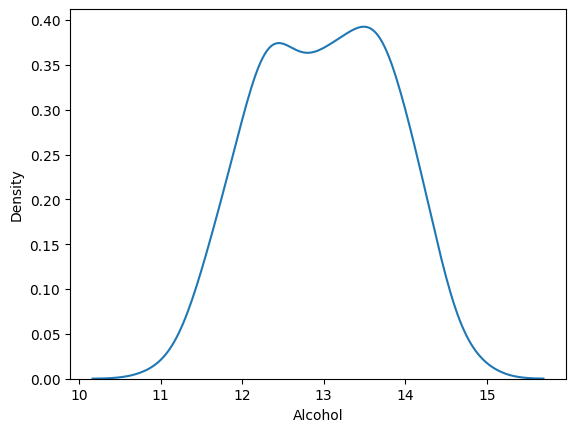

In [19]:
sns.kdeplot(new_df['Alcohol'])
plt.show()

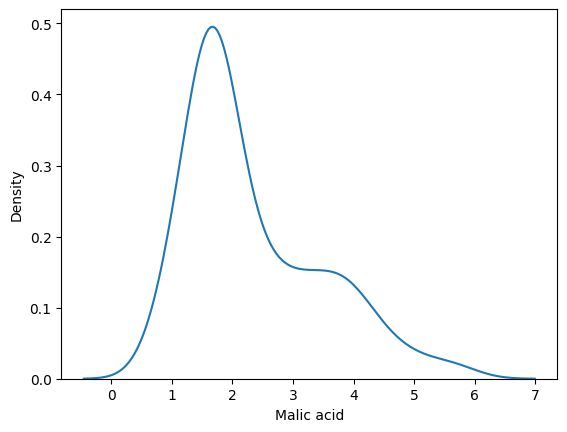

In [20]:
sns.kdeplot(new_df['Malic acid'])
plt.show()

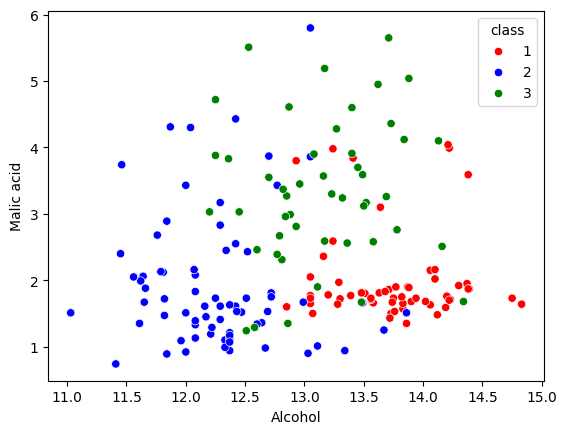

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

color_dict = {1: 'red', 2: 'blue', 3: 'green'}

sns.scatterplot(
    x=new_df['Alcohol'],
    y=new_df['Malic acid'],
    hue=new_df['class'],
    palette=color_dict
)

plt.show()


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('class', axis = 1),
                                                   new_df['class'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [30]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [32]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [33]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


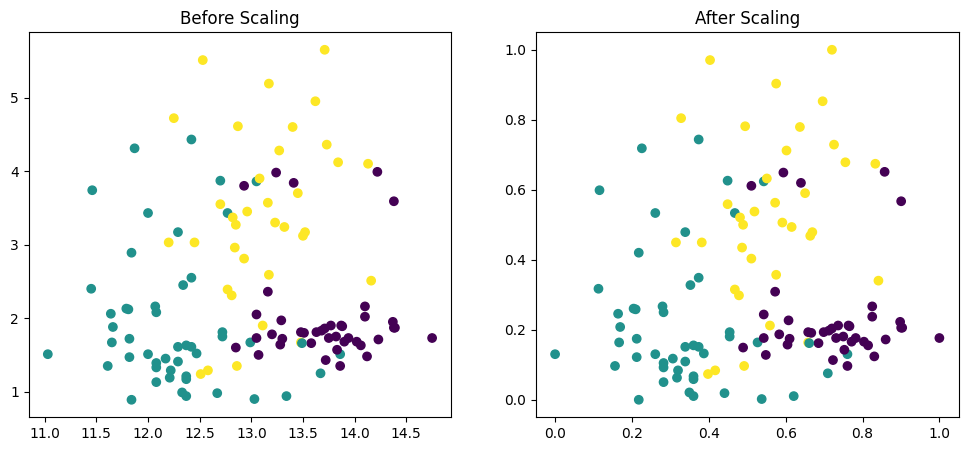

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title("After Scaling")
plt.show()

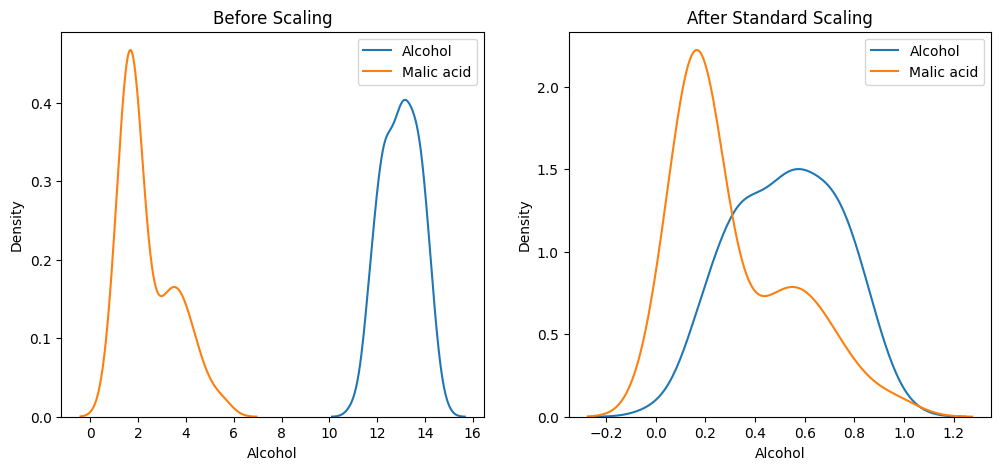

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax=ax1, label='Alcohol')
sns.kdeplot(X_train['Malic acid'], ax=ax1, label='Malic acid')
ax1.legend()

# After scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, label='Alcohol')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2, label='Malic acid')
ax2.legend()

plt.show()


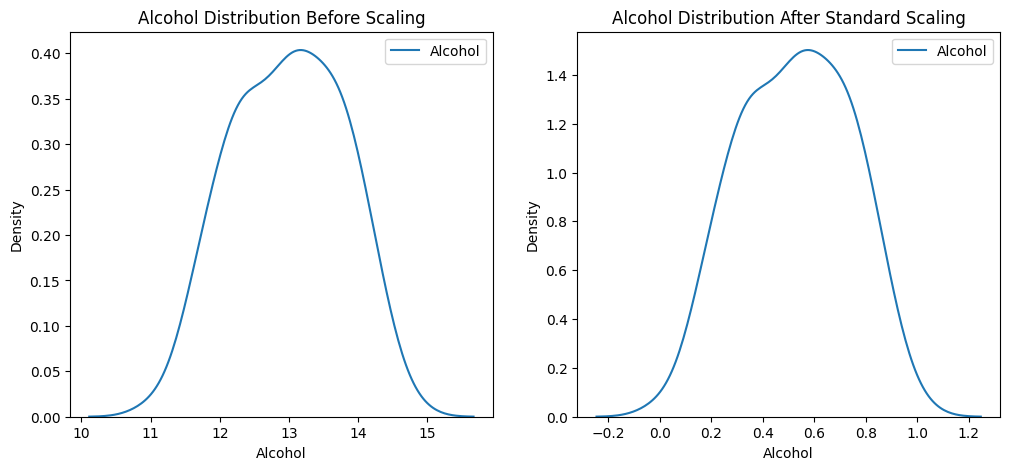

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before scaling
ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax=ax1, label='Alcohol')
ax1.legend()

# After scaling
ax2.set_title("Alcohol Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, label='Alcohol')
ax2.legend()

plt.show()


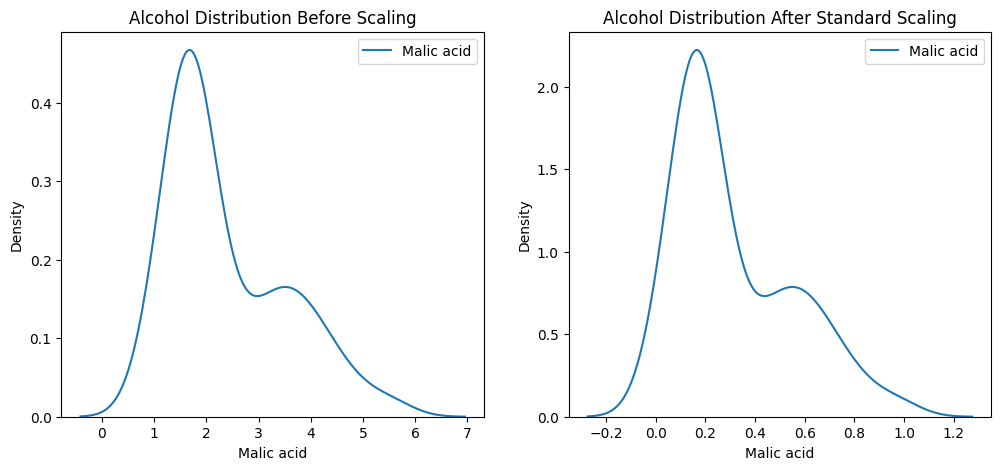

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before scaling
ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(X_train['Malic acid'], ax=ax1, label='Malic acid')
ax1.legend()

# After scaling
ax2.set_title("Alcohol Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2, label='Malic acid')
ax2.legend()

plt.show()
